# Gaussian Naive Bayes Classifier

In [14]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

## Gaussian Naive Bayes - Pre-Feature Selection

### Load Datasets

In [2]:
train_df = pd.read_csv("../data_format1/use_data/merged_df.csv")
test_df = pd.read_csv('../data_format1/test_merged_df.csv')

### Prepare Train Test Split

In [3]:
train_complete, test_complete = train_test_split(train_df, test_size=0.2, random_state=550)
X_train = train_complete.drop(['label'], axis=1)
y_train = train_complete['label']

### Gaussian Naive Bayes Model (sklearn)

In [4]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [5]:
y_pred = gnb.predict(X_train)
print("Number of mislabeled points out of a total %d points back on TRAIN SET: %d" % (X_train.shape[0], (y_train != y_pred).sum()))

Number of mislabeled points out of a total 308 points back on TRAIN SET: 60


### Evaluate

In [6]:
X_test = test_complete.drop(['label'], axis=1)
y_test = test_complete['label']

In [7]:
y_preds = gnb.predict(X_test)
y_prob = gnb.predict_proba(X_test)[:,1]

### Metrics

In [19]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve, confusion_matrix, auc

In [9]:
acc1 = accuracy_score(y_test, y_preds)
prec1, rec1, fbeta1, sup1 = precision_recall_fscore_support(y_test, y_preds)
rocauc1 = roc_auc_score(y_test, y_prob)
fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
cm1 = confusion_matrix(y_test, y_preds)

In [10]:
print(f'Accuracy: {acc1}')
print(f'Precision: {prec1}')
print(f'Recall: {rec1}')
print(f'F1-Score: {fbeta1}')
print(f'ROC-AUC: {rocauc1}')

Accuracy: 0.7922077922077922
Precision: [1.         0.23809524]
Recall: [0.77777778 1.        ]
F1-Score: [0.875      0.38461538]
ROC-AUC: 0.9291666666666667


### Plots

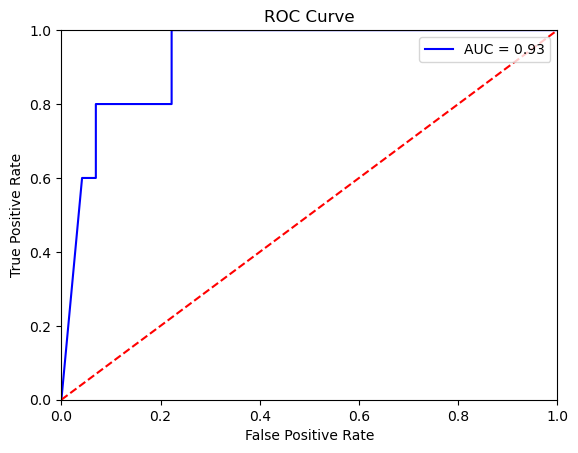

In [11]:
# ROC
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'upper right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

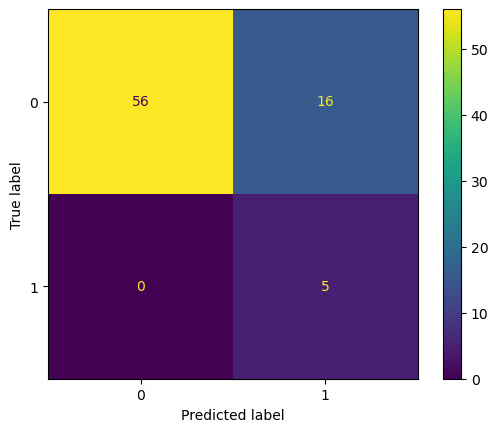

In [12]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm1)
disp.plot()

## Gaussian Naive Bayes - Post-Feature Selection

In [3]:
train50_df = pd.read_csv('./df_50.csv')

In [14]:
train50, test50 = train_test_split(train50_df, test_size=0.2, random_state=550)
X_train50 = train50.drop(['label'], axis=1)
y_train50 = train50['label']

In [15]:
gnb50 = GaussianNB()
gnb50.fit(X_train50, y_train50)

GaussianNB()

In [16]:
y_pred50 = gnb50.predict(X_train50)
print("Number of mislabeled points out of a total %d points back on TRAIN50 SET: %d" % (X_train50.shape[0], (y_train50 != y_pred50).sum()))

Number of mislabeled points out of a total 308 points back on TRAIN50 SET: 61


In [17]:
X_test50 = test50.drop(['label'], axis=1)
y_test50 = test50['label']

In [18]:
y_pred50 = gnb50.predict(X_test50)
y_prob50 = gnb50.predict_proba(X_test50)[:,1]

In [19]:
acc2 = accuracy_score(y_test50, y_pred50)
prec2, rec2, fbeta2, sup2 = precision_recall_fscore_support(y_test50, y_pred50)
rocauc2 = roc_auc_score(y_test50, y_prob50)
fpr2, tpr2, threshold2 = roc_curve(y_test50, y_prob50)
roc_auc2 = auc(fpr2, tpr2)
cm2 = confusion_matrix(y_test50, y_pred50)

In [20]:
print(f'Accuracy: {acc2}')
print(f'Precision: {prec2}')
print(f'Recall: {rec2}')
print(f'F1-Score: {fbeta2}')
print(f'ROC-AUC: {rocauc2}')

Accuracy: 0.7922077922077922
Precision: [1.         0.23809524]
Recall: [0.77777778 1.        ]
F1-Score: [0.875      0.38461538]
ROC-AUC: 0.9625


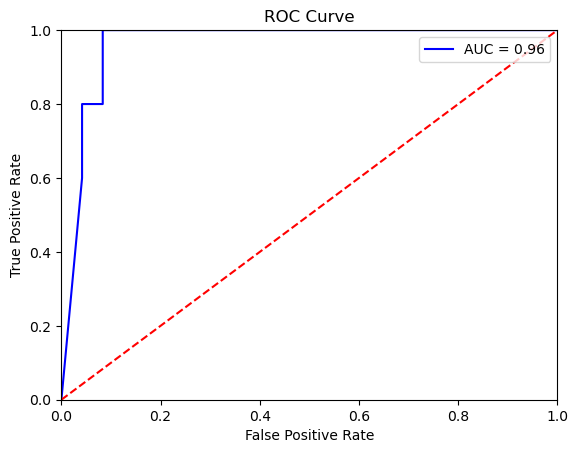

In [21]:
# ROC
plt.title('ROC Curve')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % rocauc2)
plt.legend(loc = 'upper right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

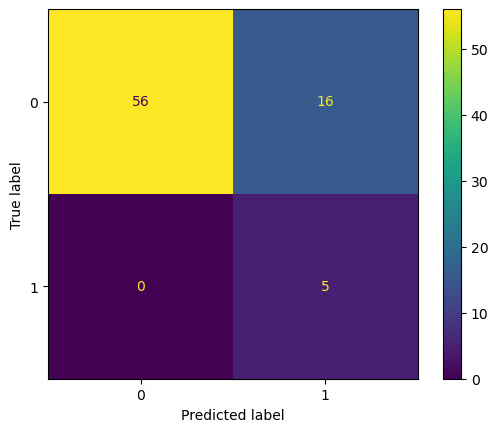

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm2)
disp.plot()

## Gaussian Naive Bayes - PCA

In [23]:
from sklearn.decomposition import PCA

X_pca = train50_df.copy()
y_pca = train50_df['label']

In [24]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_pca)

In [25]:
pcaDF = pd.DataFrame(data=principalComponents, columns=['pca1','pca2'])
finalDF = pd.concat([pcaDF, y_pca], axis=1)

In [26]:
finalDF.head()

,pca1,pca2,label
0,175507.95037,2535.847367,0
1,175507.95037,2535.847367,0
2,175507.95037,2535.847367,0
3,175507.95027,2535.844857,0
4,175507.95027,2535.844857,0


In [27]:
finalDF['label'] = finalDF['label'].fillna(0)

In [28]:
finalDF.head()

,pca1,pca2,label
0,175507.95037,2535.847367,0
1,175507.95037,2535.847367,0
2,175507.95037,2535.847367,0
3,175507.95027,2535.844857,0
4,175507.95027,2535.844857,0


In [29]:
pcaTrain, pcaTest = train_test_split(finalDF, test_size=0.2, random_state=550)

In [30]:
X_trainPCA = pcaTrain.drop(['label'], axis=1)
y_trainPCA = pcaTrain['label']

In [31]:
gnbPCA = GaussianNB()
gnbPCA.fit(X_trainPCA, y_trainPCA)

GaussianNB()

In [32]:
X_testPCA = pcaTest.drop(['label'], axis=1)
y_testPCA = pcaTest['label']

In [33]:
y_predPCA = gnbPCA.predict(X_testPCA)
y_probPCA = gnbPCA.predict_proba(X_testPCA)[:,1]

In [34]:
accPCA = accuracy_score(y_testPCA, y_predPCA)
precPCA, recPCA, fbetaPCA, supPCA = precision_recall_fscore_support(y_testPCA, y_predPCA)
rocaucPCA = roc_auc_score(y_testPCA, y_probPCA)
fprPCA, tprPCA, thresholdPCA = roc_curve(y_testPCA, y_probPCA)
roc_aucPCA = auc(fprPCA, tprPCA)
cmPCA = confusion_matrix(y_testPCA, y_predPCA)

/home/jahme/miniconda3/envs/patRec/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
print(f'Accuracy: {accPCA}')
print(f'Precision: {precPCA}')
print(f'Recall: {recPCA}')
print(f'F1-Score: {fbetaPCA}')
print(f'ROC-AUC: {rocaucPCA}')

Accuracy: 0.935064935064935
Precision: [0.93506494 0.        ]
Recall: [1. 0.]
F1-Score: [0.96644295 0.        ]
ROC-AUC: 0.9222222222222223


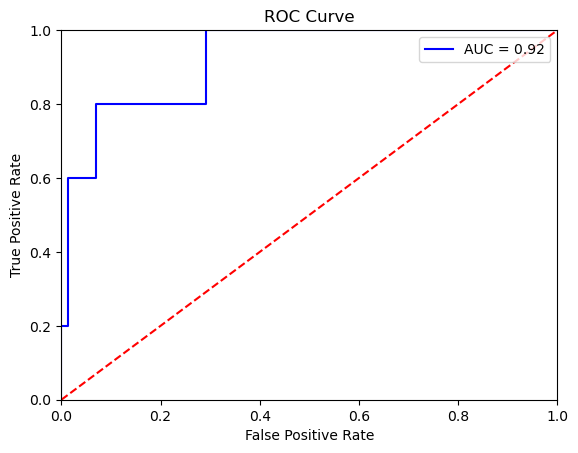

In [36]:
# ROC
plt.title('ROC Curve')
plt.plot(fprPCA, tprPCA, 'b', label = 'AUC = %0.2f' % roc_aucPCA)
plt.legend(loc = 'upper right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

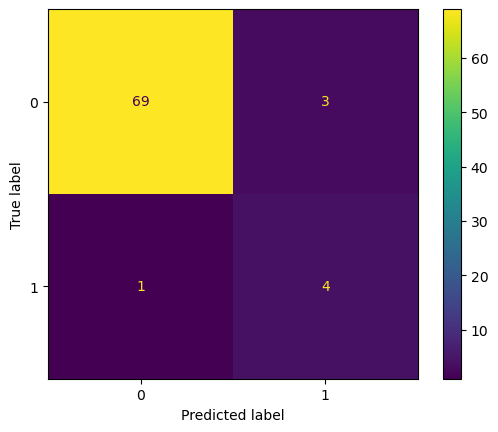

In [37]:
disp = ConfusionMatrixDisplay(confusion_matrix = cmPCA)
disp.plot()

